<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb) | [Contents](Index.ipynb) | [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.02-The-Basics-Of-NumPy-Arrays.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# The Basics of NumPy Arrays

Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas ([Chapter 3](03.00-Introduction-to-Pandas.ipynb)) are built around the NumPy array.
This section will present several examples of using NumPy array manipulation to access data and subarrays, and to split, reshape, and join the arrays.
While the types of operations shown here may seem a bit dry and pedantic, they comprise the building blocks of many other examples used throughout the book.
Get to know them well!

We'll cover a few categories of basic array manipulations here:

- *Attributes of arrays*: Determining the size, shape, memory consumption, and data types of arrays
- *Indexing of arrays*: Getting and setting the value of individual array elements
- *Slicing of arrays*: Getting and setting smaller subarrays within a larger array
- *Reshaping of arrays*: Changing the shape of a given array
- *Joining and splitting of arrays*: Combining multiple arrays into one, and splitting one array into many

## NumPy Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

Another useful attribute is the ``dtype``, the data type of the array (which we discussed previously in [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb)):

Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

## Array Indexing: Accessing Single Elements

If you are familiar with Python's standard list indexing, indexing in NumPy will feel quite familiar.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [1]:
import numpy as np

In [3]:
my_1d_array = np.random.uniform(size=10)
my_1d_array

array([0.77181897, 0.25720909, 0.58867255, 0.24353031, 0.84061593,
       0.34915391, 0.51965572, 0.72611426, 0.59566204, 0.33967845])

In [4]:
my_1d_array[0]

0.7718189724538993

In [6]:
my_1d_array[2:8:3]

array([0.58867255, 0.34915391])

In [5]:
my_1d_array[-1]

0.33967845423083076

In [11]:
my_2d_array = my_1d_array.reshape((5, 2))
my_2d_array

array([[0.77181897, 0.25720909],
       [0.58867255, 0.24353031],
       [0.84061593, 0.34915391],
       [0.51965572, 0.72611426],
       [0.59566204, 0.33967845]])

In [26]:
my_2d_array[0:2, 0] = 99

In [27]:
my_2d_array

array([[99.        ,  0.25720909],
       [99.        ,  0.24353031],
       [ 0.84061593,  0.34915391],
       [ 0.51965572,  0.72611426],
       [ 0.59566204,  0.33967845]])

In [16]:
my_2d_array[0]

array([0.77181897, 0.25720909])

In [15]:
my_2d_array[-1]

array([0.59566204, 0.33967845])

In [29]:
np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2])  # not a valid solution :)

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [31]:
arr_a = np.full(10, 1)
# arr_a = np.ones(10)
arr_a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
arr_a[1::2] = 2
arr_a

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [34]:
chessboard = np.zeros((8, 8), dtype=np.int)
chessboard

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [40]:
chessboard[::2, ::2] = 1
chessboard[1::2, 1::2] = 1
#chessboard

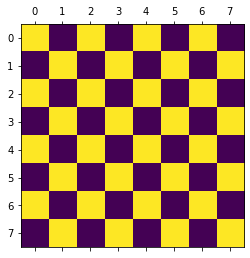

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.matshow(chessboard)

To index from the end of the array, you can use negative indices:

In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices:

Values can also be modified using any of the above index notation:

Keep in mind that, unlike Python lists, NumPy arrays have a fixed type.
This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

### One-dimensional subarrays

A potentially confusing case is when the ``step`` value is negative.
In this case, the defaults for ``start`` and ``stop`` are swapped.
This becomes a convenient way to reverse an array:

### Multi-dimensional subarrays

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

Finally, subarray dimensions can even be reversed together:

#### Accessing array rows and columns

One commonly needed routine is accessing of single rows or columns of an array.
This can be done by combining indexing and slicing, using an empty slice marked by a single colon (``:``):

In the case of row access, the empty slice can be omitted for a more compact syntax:

### Subarrays as no-copy views

One important–and extremely useful–thing to know about array slices is that they return *views* rather than *copies* of the array data.
This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies.
Consider our two-dimensional array from before:

Let's extract a $2 \times 2$ subarray from this:

Now if we modify this subarray, we'll see that the original array is changed! Observe:

This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

### Creating copies of arrays

Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the ``copy()`` method:

If we now modify this subarray, the original array is not touched:

## Reshaping of Arrays

Another useful type of operation is reshaping of arrays.
The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

Note that for this to work, the size of the initial array must match the size of the reshaped array. 
Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix.
This can be done with the ``reshape`` method, or more easily done by making use of the ``newaxis`` keyword within a slice operation:

In [ ]:
# row vector via reshape

In [ ]:
# row vector via newaxis

In [ ]:
# column vector via reshape

In [ ]:
# column vector via newaxis

We will see this type of transformation often throughout the remainder of the book.

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We'll take a look at those operations here.

### Concatenation of arrays

Concatenation, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

You can also concatenate more than two arrays at once:

It can also be used for two-dimensional arrays:

In [ ]:
# concatenate along the first axis

In [ ]:
# concatenate along the second axis (zero-indexed)

For working with arrays of mixed dimensions, it can be clearer to use the ``np.vstack`` (vertical stack) and ``np.hstack`` (horizontal stack) functions:

In [ ]:
# vertically stack the arrays

In [ ]:
# horizontally stack the arrays

Similary, ``np.dstack`` will stack arrays along the third axis.

### Splitting of arrays

The opposite of concatenation is splitting, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

Notice that *N* split-points, leads to *N + 1* subarrays.
The related functions ``np.hsplit`` and ``np.vsplit`` are similar:

Similarly, ``np.dsplit`` will split arrays along the third axis.

<!--NAVIGATION-->
< [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb) | [Contents](Index.ipynb) | [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.02-The-Basics-Of-NumPy-Arrays.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
